In [1]:
from libraries import *
from parameters import *
from numpy import asarray
from numpy import savetxt
import matplotlib as mpl

%matplotlib inline

In [2]:
os.getcwd()
os.chdir(projectDir)

In [3]:
%load_ext rpy2.ipython

In [4]:
adata = sc.read('outputs/anndata/adata-hash-features_SingleKO_ForSCVI_09072021.h5ad')
zs = ["K_0", "K_1","K_2", "K_3", "K_4", "K_5", "K_CONTROL"]
#mpl.rcParams["axes.prop_cycle"]

In [5]:
adata.obs["subCellType"] = "DC2"
adata.obs.loc[adata.obs.leiden.isin(['3']), "subCellType"] = "MacDC"
adata.obs.loc[adata.obs.leiden.isin(['8']), "subCellType"] = "DC1"
adata.obs.loc[adata.obs.leiden.isin(['5']), "subCellType"] = "MReg"

In [6]:
fBarMat = adata.obs[zs]
fBarMat["leiden"] = adata.obs['leiden']
fBarMat

/tmp/ipykernel_21456/2382015570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fBarMat["leiden"] = adata.obs['leiden']


K_0  K_1  K_2  K_3  K_4  K_5  K_CONTROL leiden
AAACGAAAGCAGTCTT-1-E3-1-0     0    1    0    0    0    0          0      0
AAACGAATCTCAACCC-1-E3-1-0     0    0    0    1    0    0          0      0
AAACGCTAGTTGTAGA-1-E3-1-0     0    0    0    0    0    0          1      0
AAACGCTCAAAGACGC-1-E3-1-0     1    0    0    0    0    0          0      1
AAACGCTCAGTGTACT-1-E3-1-0     0    0    1    0    0    0          0      1
...                         ...  ...  ...  ...  ...  ...        ...    ...
TTTGGTTCACCTGATA-1-E4-24-0    0    0    1    0    0    0          0      0
TTTGGTTCAGATCACT-1-E4-24-0    0    0    0    1    0    0          0      0
TTTGGTTGTCATCACA-1-E4-24-0    0    0    0    1    0    0          0      0
TTTGTTGAGTCATCCA-1-E4-24-0    1    0    0    0    0    0          0      2
TTTGTTGCAGGACATG-1-E4-24-0    1    0    0    0    0    0          0      0

[120586 rows x 8 columns]

In [7]:
allGuidesPerSCT = pd.DataFrame()

for elem in zs:
    print(elem)
    k = pd.DataFrame(pd.crosstab(fBarMat[elem], fBarMat.leiden))
    k = k.loc[k.index == 1,]
    k["KOGuide"] = elem
    allGuidesPerSCT = allGuidesPerSCT.append(k)

allGuidesPerSCT['noOfKOGroupCells'] = allGuidesPerSCT.loc[:,["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]].sum(axis=1)

K_0
K_1


/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


K_2
K_3
K_4


/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


K_5
K_CONTROL


/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)
/tmp/ipykernel_21456/2193428281.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allGuidesPerSCT = allGuidesPerSCT.append(k)


In [8]:
allGuidesPerSCT

leiden      0     1     2     3     4     5    6    7    8   9    KOGuide  \
1        7189  5209  4218  2758  1262   635  549  349  259  14        K_0   
1        5033  3594  3902  2501   722   531  462  279  236  26        K_1   
1        4717  3902  3010  2435   949   517  404  214  231  18        K_2   
1        4805  4485  2777  2946   559   435  344  235  293  24        K_3   
1        1762   988   934   307   256   143  115   74   42   0        K_4   
1         550   500   365   180    77    60   38   30   14   0        K_5   
1       12120  9730  7980  6149  1603  1259  954  701  584  43  K_CONTROL   

leiden  noOfKOGroupCells  
1                  22442  
1                  17286  
1                  16397  
1                  16903  
1                   4621  
1                   1814  
1                  41123

In [8]:
%%R  -i allGuidesPerSCT -w 11 -h 8 -u in

saveRDS(allGuidesPerSCT, "/home/beraslan/jovian-work/analysisSingle/outputs/RDSFiles/KOGroupsPerLeiden.rds")

In [9]:
for i in range(0,6):
    adata.obs[f'K_{i}'] = adata.obs[f'K_{i}'].astype(str)

In [10]:
adata.obs[f'K_CONTROL'] = adata.obs[f'K_CONTROL'].astype(str)

/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureW

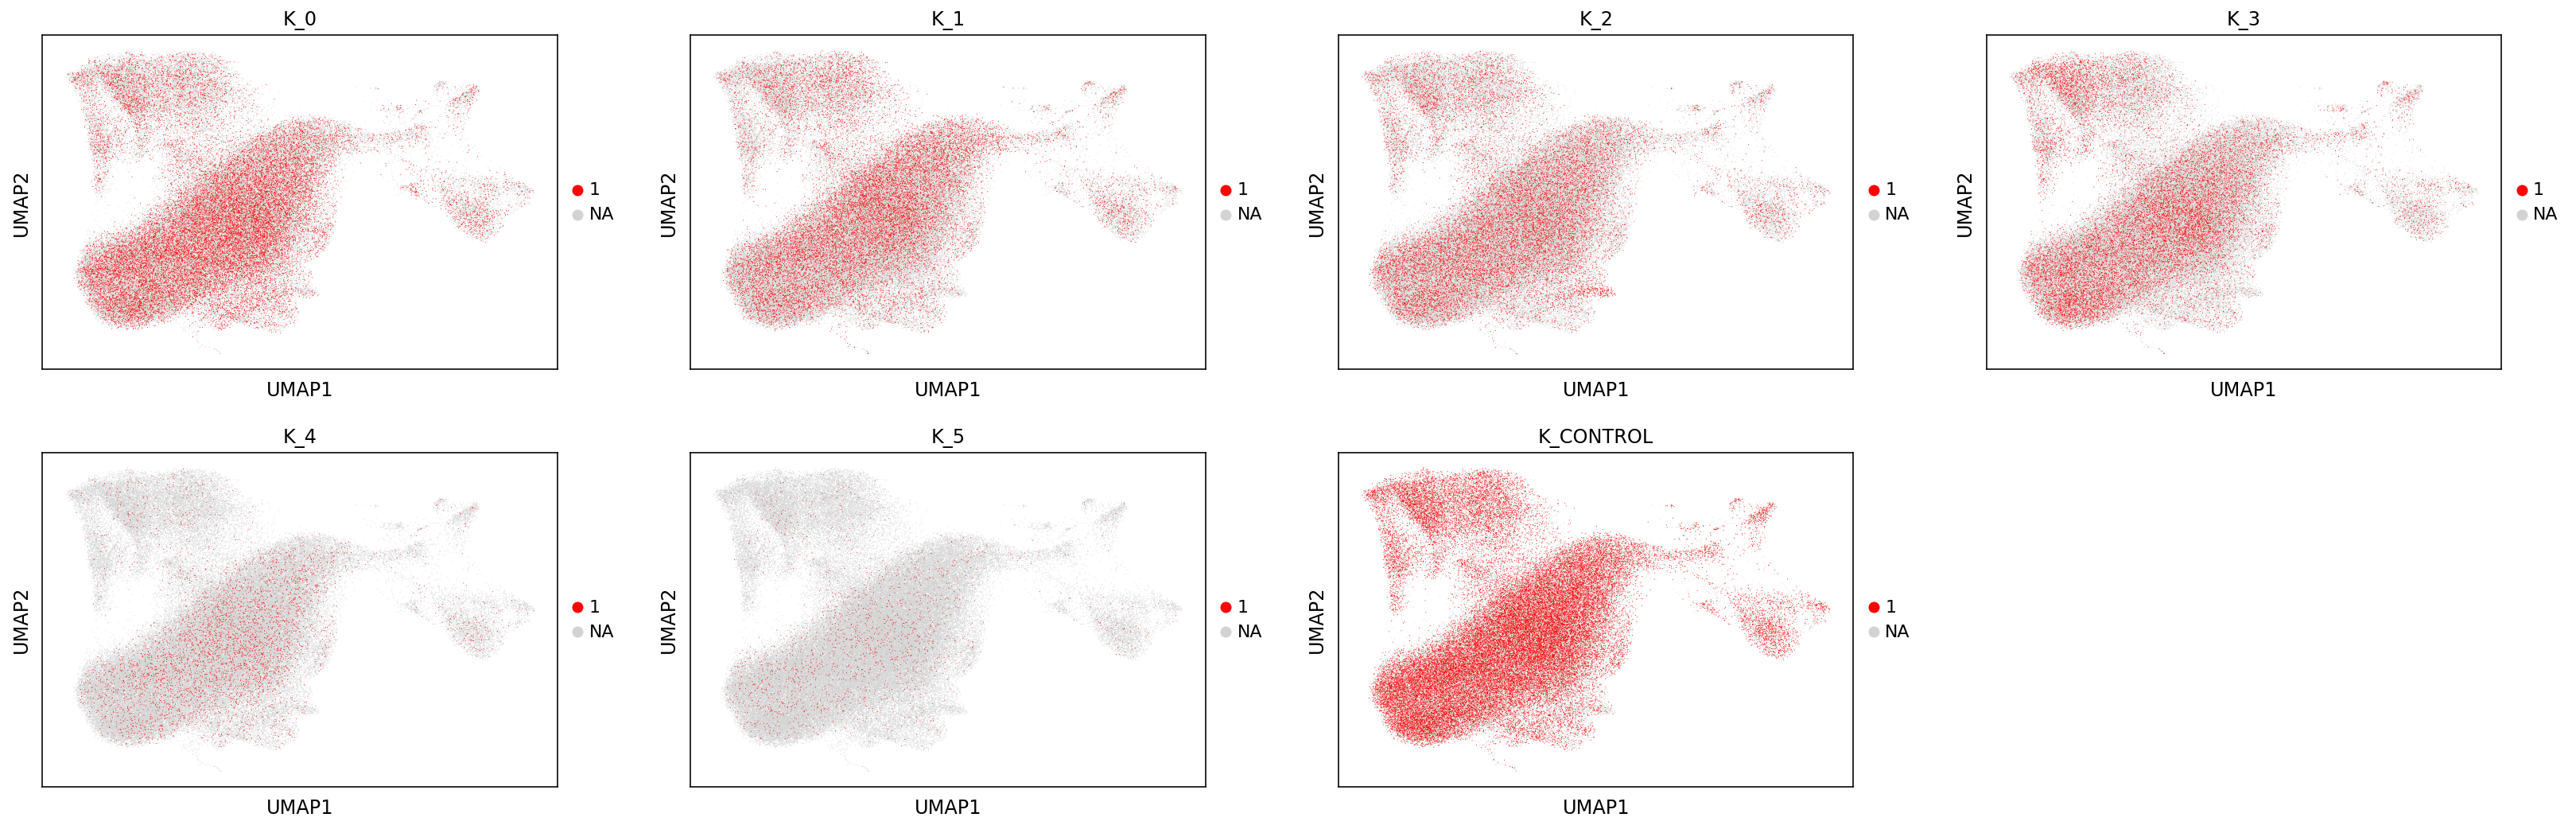

In [11]:
sc.pl.umap(adata, color=zs, ncols=4, palette=["grey", "red"], groups="1")

In [12]:
sc.tl.embedding_density(adata, groupby="K_0")
sc.tl.embedding_density(adata, groupby="K_1")
sc.tl.embedding_density(adata, groupby="K_2")
sc.tl.embedding_density(adata, groupby="K_3")
sc.tl.embedding_density(adata, groupby="K_4")
sc.tl.embedding_density(adata, groupby="K_5")
sc.tl.embedding_density(adata, groupby="K_CONTROL")

computing density on 'umap'
--> added
    'umap_density_K_0', densities (adata.obs)
    'umap_density_K_0_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_1', densities (adata.obs)
    'umap_density_K_1_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_2', densities (adata.obs)
    'umap_density_K_2_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_3', densities (adata.obs)
    'umap_density_K_3_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_4', densities (adata.obs)
    'umap_density_K_4_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_5', densities (adata.obs)
    'umap_density_K_5_params', parameter (adata.uns)
computing density on 'umap'
--> added
    'umap_density_K_CONTROL', densities (adata.obs)
    'umap_density_K_CONTROL_params', parameter (adata.uns)


In [12]:
for i in range(0,6):
    a = adata.obs[f'umap_density_K_{i}'].values
    b = adata.obs["umap_density_K_CONTROL"].values
    if(min(a - b) < 0):
        adata.obs[f'K_{i}_over_CONTROL'] = (a - b) 
    

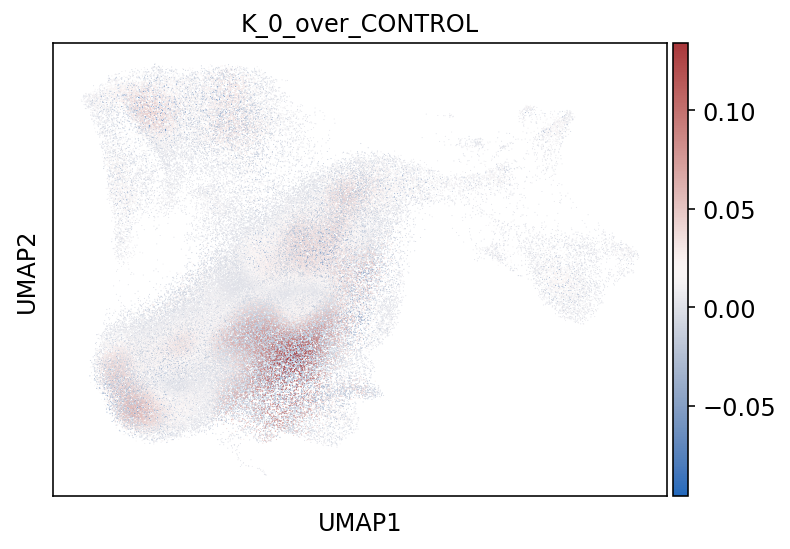

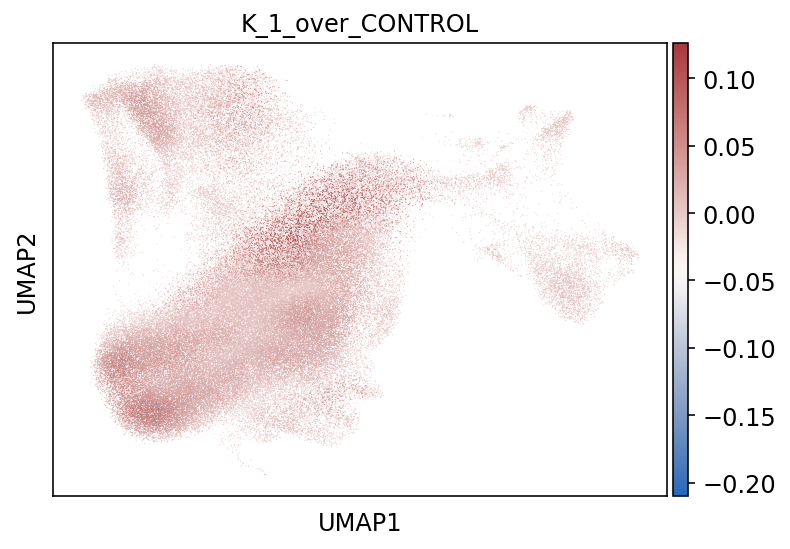

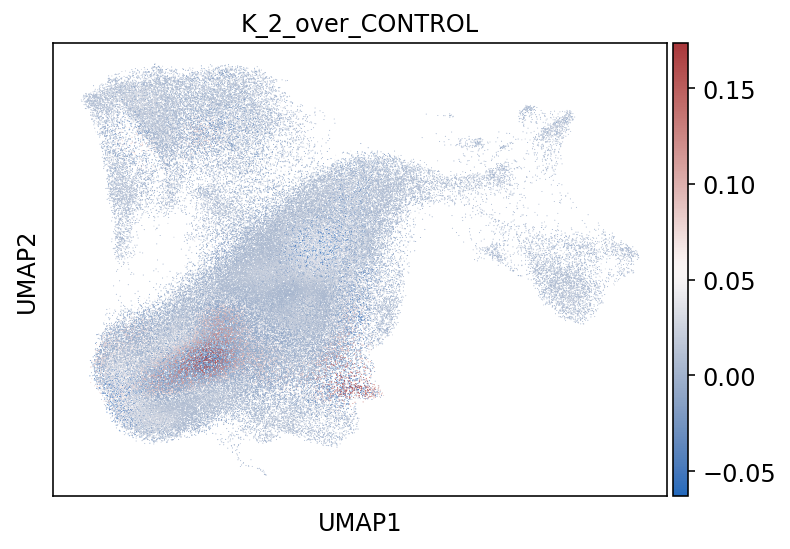

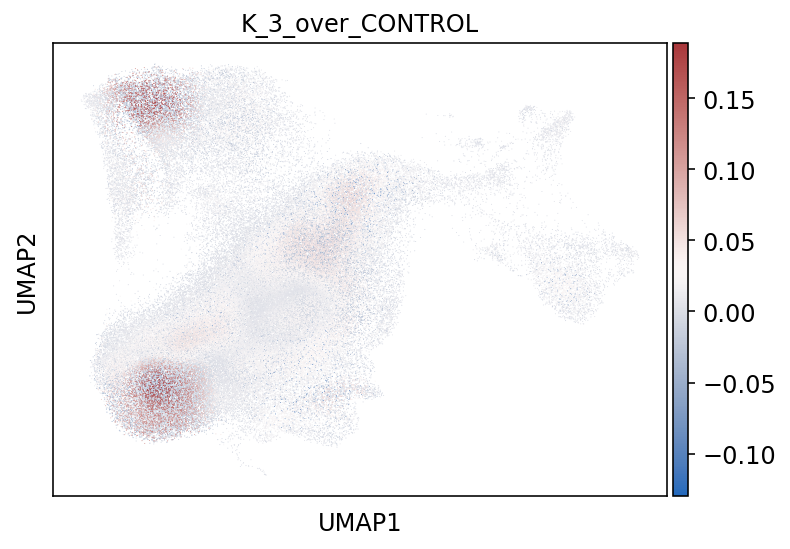

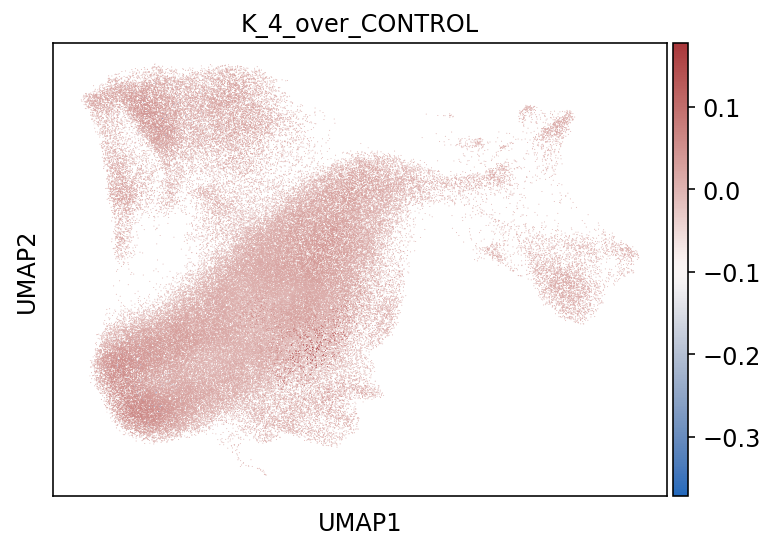

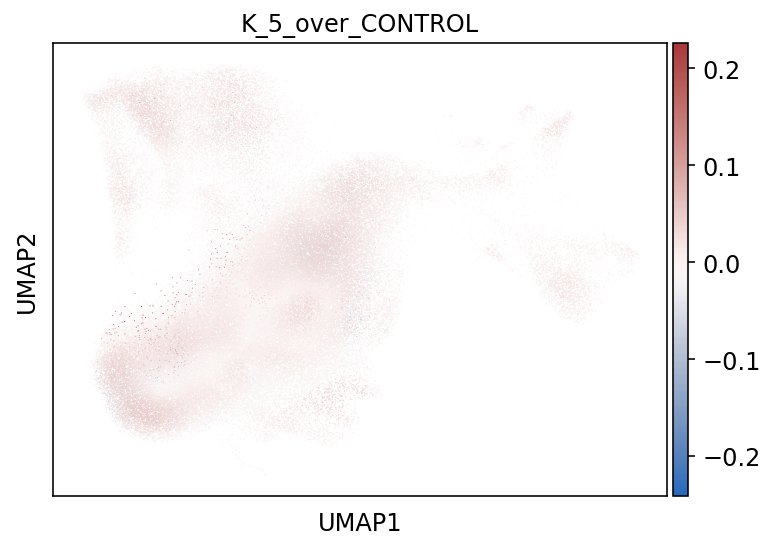

In [13]:
for i in range(0,6):
    sc.pl.umap(adata, color='K_'+str(i)+'_over_CONTROL', color_map='vlag' )

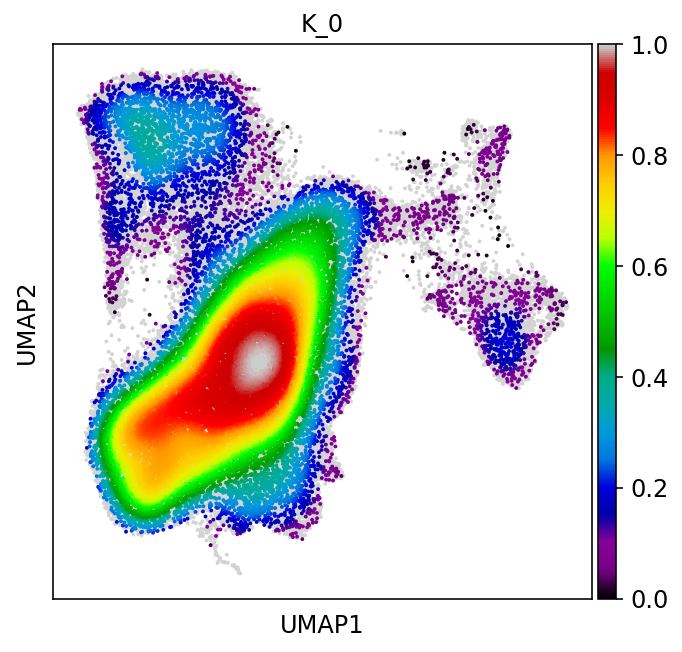

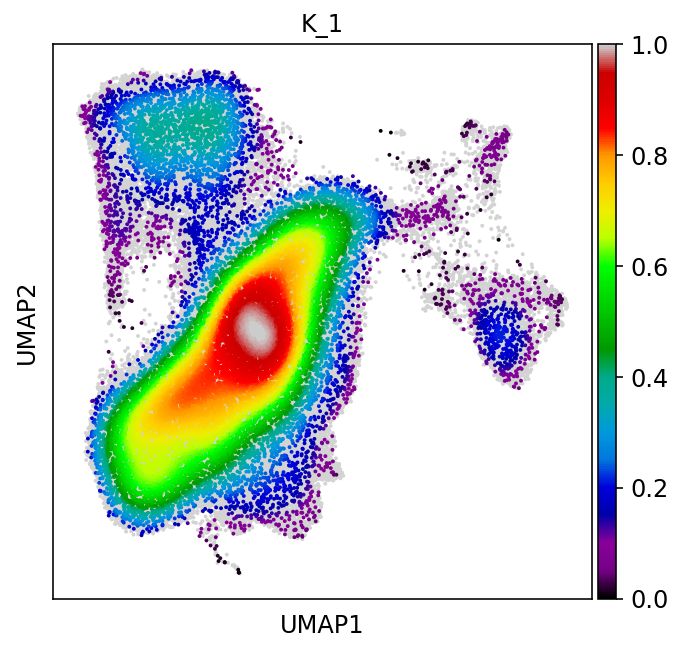

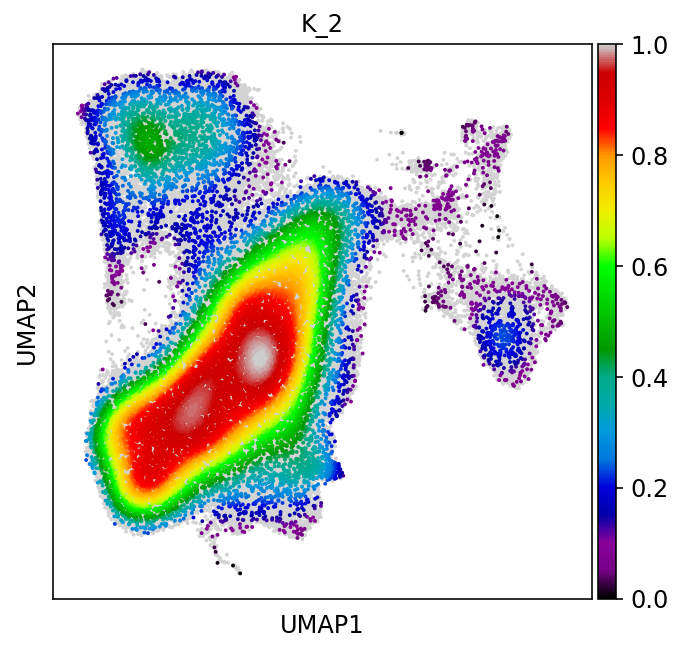

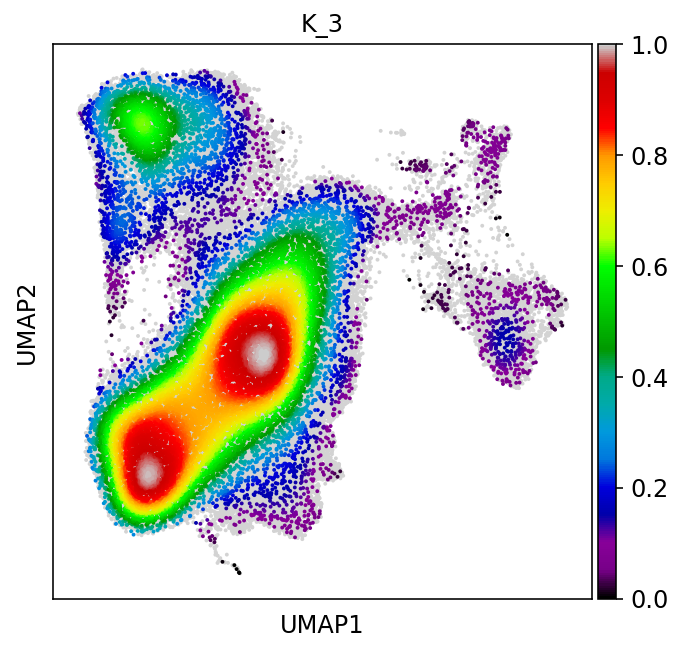

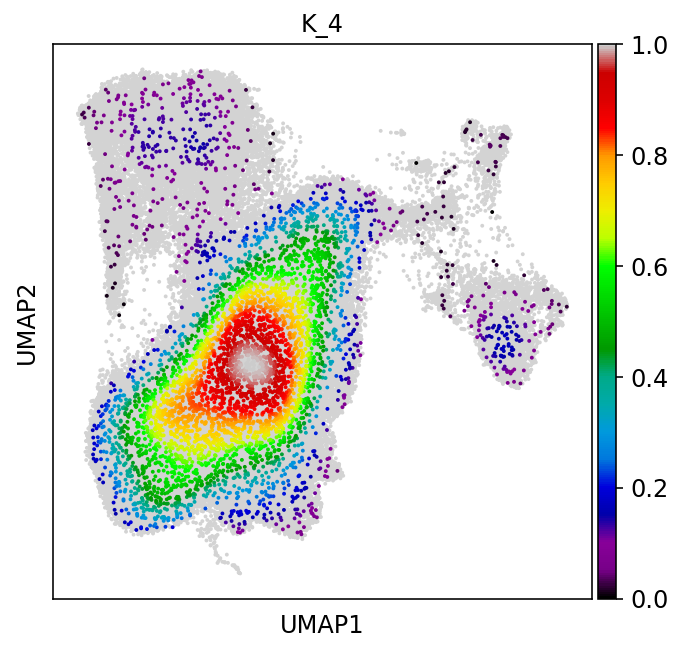

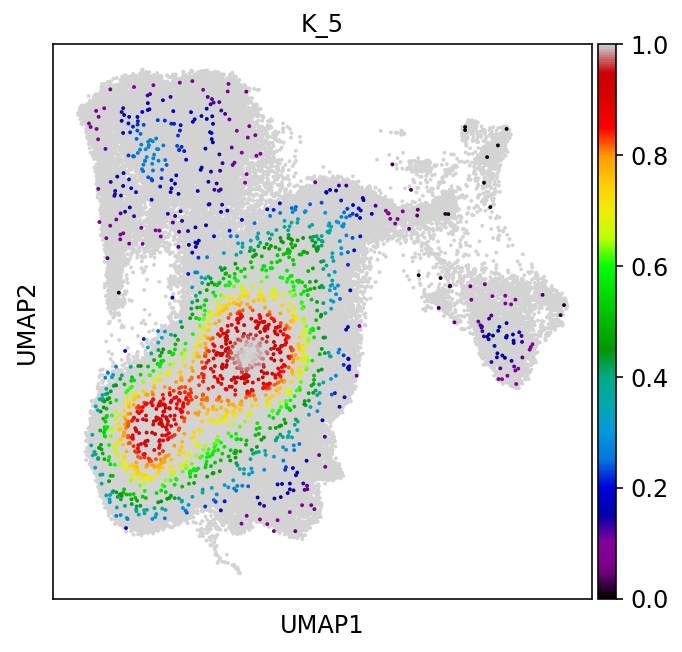

In [35]:
for i in range(0,6):
    kk = sc.pl.embedding_density(adata, key="umap_density_K_"+str(i), 
                            group="1", color_map="nipy_spectral", bg_dotsize=15, fg_dotsize=15,
                            title="K_"+str(i), return_fig=True)
    kk.set_size_inches(5.2,5)
    kk.savefig("umap_density_K_"+str(i)+".pdf")

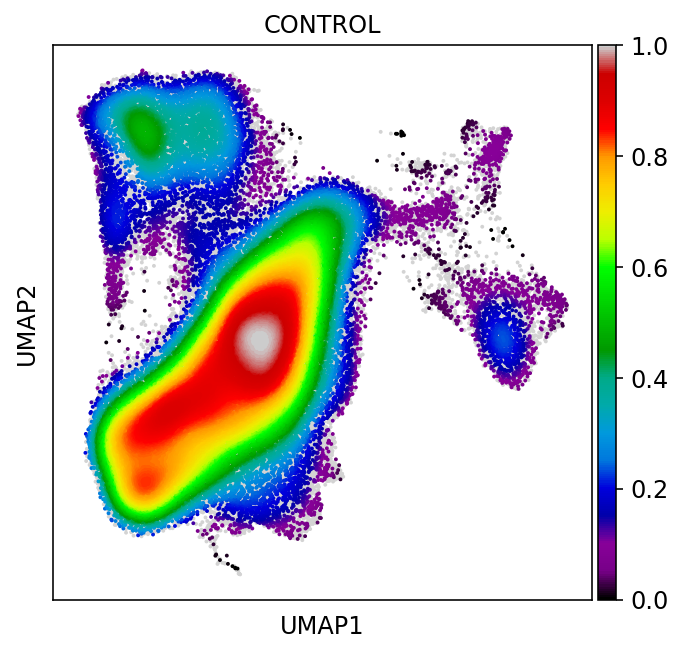

In [36]:
kk = sc.pl.embedding_density(adata, key="umap_density_K_CONTROL", group="1", bg_dotsize=15, fg_dotsize=15,
                        color_map="nipy_spectral",
                        title="CONTROL", return_fig=True)



kk.set_size_inches(5.2,5)

kk.savefig('umap_density_K_CONTROL.pdf')  